In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from tqdm import tqdm

In [3]:
a=5
p=0.1

In [4]:
def S_calc(N, p, K):
    n=int(p*N)
    M=len(K)
    
    X_full=np.arange(0,N*a,a)
    
    # to_remove = np.random.randint(0,X_full.shape[0],n)
    # # if randint gave the same index twice or more
    # if len(np.unique(to_remove)) < n:
    #     raise Exception("repeating indices, try again")
    to_remove = np.random.choice(X_full.shape[0],n,replace=False)
    X = np.delete(X_full, to_remove)
    dX = X.reshape((N-n,1)) - X.reshape((1,N-n)) 
    S = 1/(N-n) * np.abs(np.exp(1j*K.reshape((1,1,M))*dX.reshape((N-n,N-n,1))).sum((0,1)))**2
    return S

In [5]:
def S_mean_calc(N, p, K):
    config_count=20
    S_values = []

    for i in tqdm(range(config_count)):
        S=S_calc(N, p, K)
        S_values.append(S)

    S_mean = np.mean(S_values,0)
    return S_mean, S_values

In [7]:
N=250
M=3*N
K = np.linspace(-1*np.pi/a,1*np.pi/a,M)
S_mean, S_values = S_mean_calc(N, p, K)

window = 10
S_smoothed = np.convolve(S_values[0], np.ones(window)/window, mode='same') 

dk = K[1]-K[0]

100%|██████████| 20/20 [00:43<00:00,  2.17s/it]


In [ ]:
window = 10
S_smoothed = np.convolve(S_values[0], np.ones(window)/window, mode='same') 

In [8]:
peaks, properties = find_peaks(S_mean, prominence=1e5, width=np.pi/a/100)

In [9]:
S_mean[peaks]

array([9464032.51297626])

In [10]:
a*dk*properties["left_ips"]-np.pi - (a*dk*properties["right_ips"]-np.pi)

array([-0.018824])

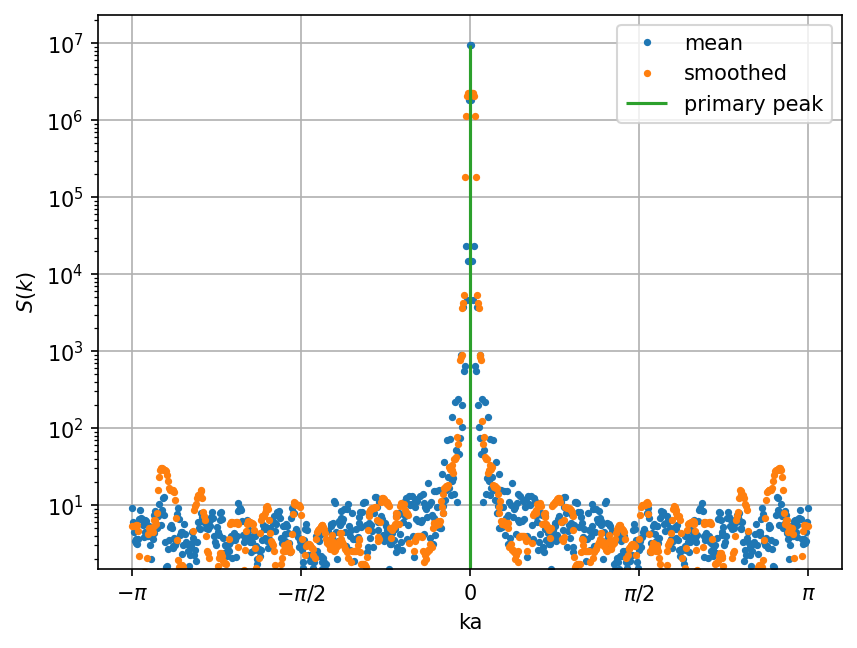

In [11]:
plt.figure(dpi=150)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],[r'$-\pi$',r'$-\pi/2$',r'$0$',r'$\pi/2$',r'$\pi$'])
plt.yscale('log')
plt.ylabel(r'$S\left(k\right)$')
plt.xlabel('ka')
plt.grid()
plt.plot(K*a, S_mean, '.', label='mean', markersize=5)
plt.plot(K*a, S_smoothed, '.', label='smoothed', markersize=5)
plt.vlines(x=a*K[peaks], ymin=S_mean[peaks] - properties["prominences"],
           ymax = S_mean[peaks], color = "C2", label='primary peak')
plt.hlines(y=properties["width_heights"], xmin=a*dk*properties["left_ips"]-np.pi,
           xmax=a*dk*properties["right_ips"]-np.pi, color = "C2")
plt.legend()
plt.ylim(bottom=np.max([1e-3,S_mean.min()]))
plt.show()

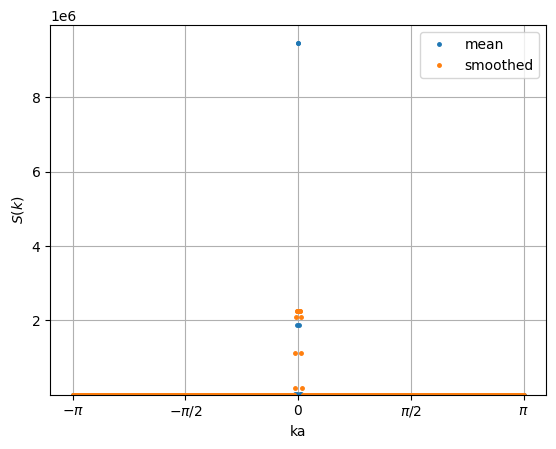

In [22]:
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],[r'$-\pi$',r'$-\pi/2$',r'$0$',r'$\pi/2$',r'$\pi$'])
# plt.yscale('log')
plt.ylabel(r'$S\left(k\right)$')
plt.xlabel('ka')
plt.grid()
plt.plot(K*a, S_mean, '.', label='mean', markersize=5)
plt.plot(K*a, S_smoothed, '.', label='smoothed', markersize=5)
# plt.vlines(x=a*K[peaks], ymin=S_mean[peaks] - properties["prominences"],
#            ymax = S_mean[peaks], color = "C2", label='primary peak')
# plt.hlines(y=properties["width_heights"], xmin=a*dk*properties["left_ips"]-np.pi,
#            xmax=a*dk*properties["right_ips"]-np.pi, color = "C2")
plt.legend()
plt.ylim(bottom=np.max([1e-3,S_mean.min()]))
plt.show()

In [13]:
total_peaks = []
total_widths = []
Nspace = np.logspace(np.log(5),np.log(200),20,base=np.e).astype(int)
nspace = (Nspace*p).astype(int)
for N in Nspace:
     M=15*N
     K = np.linspace(-1*np.pi/a,1*np.pi/a,M)
     S=S_calc(N,p,K)
     window=10
     S_smoothed = np.convolve(S, np.ones(window)/window, mode='same') 
     
     dk = K[1]-K[0]
     peaks, properties = find_peaks(S_smoothed, prominence=1e1, width=np.pi/a/10)
     main=np.argmax(S_smoothed[peaks])
     width = (a*dk*properties["right_ips"]-np.pi) - (a*dk*properties["left_ips"]-np.pi)
     total_peaks.append(S_smoothed[peaks[main]])
     total_widths.append(width[main])     

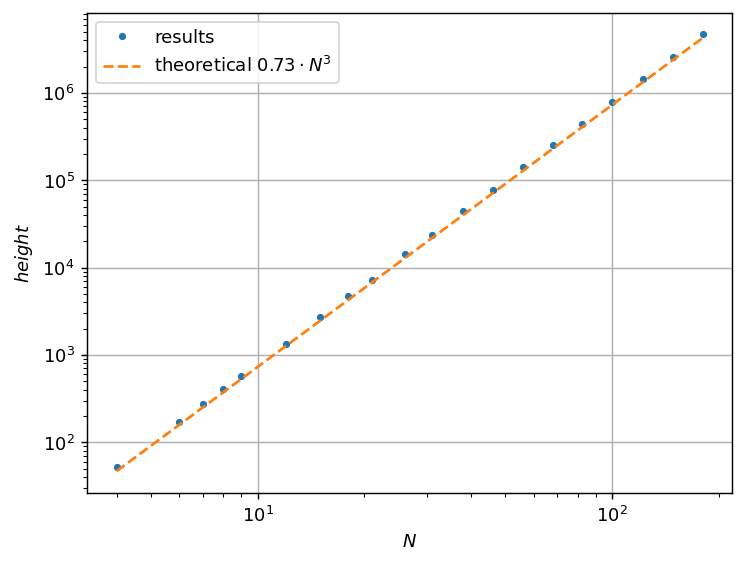

In [28]:
plt.figure(dpi=130)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.ylabel(r'$height$')
plt.xlabel(r'$N$')
plt.plot((Nspace-nspace), total_peaks, '.', label='results')
plt.plot((Nspace-nspace), 0.729*((Nspace-nspace))**3, '--', label=r'theoretical $0.73 \cdot N^3$')
plt.legend()
plt.show()

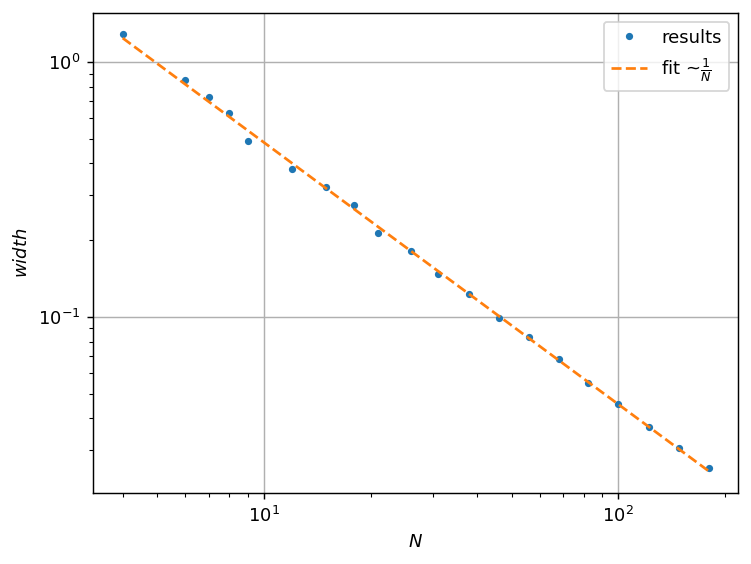

In [27]:
from scipy.stats import linregress

reg=linregress(np.log(Nspace-nspace), np.log(total_widths))

plt.figure(dpi=130)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.ylabel(r'$width$')
plt.xlabel(r'$N$')
plt.plot((Nspace-nspace), total_widths, '.', label='results')
plt.plot((Nspace-nspace), np.exp(reg.intercept)*(Nspace-nspace)**(reg.slope), '--', label=r'fit ~$\frac{1}{N}$')
plt.legend()
plt.show()